# T-S diagram
Here is an example of creating a T-S diagram

In [3]:
import gsw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Step 1 download data from BATS and create data vectors
# define headers first (since the excel sheet doesn't have one)
headers=['castid','dyear','date','lat','lon','pres','depth',
         'temperature','cond','salinity','DO','beam','fluo','PAR']
# read in the excel file
df=pd.read_excel('../week1/b10331_ctd.xls',names=headers)
# display the overview of the contents of the excel sheet
df

,castid,dyear,date,lat,lon,pres,depth,temperature,cond,salinity,DO,beam,fluo,PAR
0,10331002,2016.946831,20161212,32.340767,64.593733,6,5.957368,21.586572,5.164972,36.680332,214.389597,0.442891,0.091892,178.098363
1,10331002,2016.946831,20161212,32.340767,64.593733,8,7.943637,21.587190,5.165100,36.680104,214.363203,0.442685,0.093883,146.975808
2,10331002,2016.946831,20161212,32.340767,64.593733,10,9.929642,21.587471,5.165239,36.680258,214.387684,0.442694,0.095130,124.969126
3,10331002,2016.946831,20161212,32.340767,64.593733,12,11.915647,21.587751,5.165378,36.680412,214.412165,0.442704,0.096377,102.962444
4,10331002,2016.946831,20161212,32.340767,64.593733,14,13.901856,21.588130,5.165469,36.680100,214.356475,0.442440,0.097961,93.945029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,10331017,2016.957256,20161216,31.978617,64.377817,1204,1192.162127,5.601566,3.460286,35.076543,223.434746,0.394602,0.022846,0.000493
9475,10331017,2016.957256,20161216,31.978617,64.377817,1206,1194.137209,5.599297,3.460209,35.077042,223.543457,0.394695,0.023517,0.000492
9476,10331017,2016.957256,20161216,31.978617,64.377817,1208,1196.111576,5.592080,3.459727,35.078075,223.945523,0.394700,0.021617,0.000492
9477,10331017,2016.957256,20161216,31.978617,64.377817,1210,1198.085631,5.591776,3.459910,35.079488,223.735999,0.394700,0.016633,0.000457


In [5]:
# get castid and convert it to numpy array
castid=df['castid'].to_numpy()
# latitude
lat=df['lat'].to_numpy()
# longitude
lon=df['castid'].to_numpy()*(-1) # longitude is in degree W so it should be negative
# depth
dep=df['depth'].to_numpy()
# pressure
p=df['pres'].to_numpy()
# temperature
t=df['temperature'].to_numpy()
# salinity
sp=df['salinity'].to_numpy()

In [6]:
# TEOS-10 calculations
SA=gsw.SA_from_SP(sp,p,lon,lat);
CT=gsw.CT_from_t(SA,t,p);

In [11]:
# define X and Y axes of the T-S diagram
s0=np.linspace(np.nanmin(SA)-.5,np.nanmax(SA)+.5,100)
t0=np.linspace(np.nanmin(CT)-3,np.nanmax(CT)+3,100)
X,Y=np.meshgrid(s0,t0)

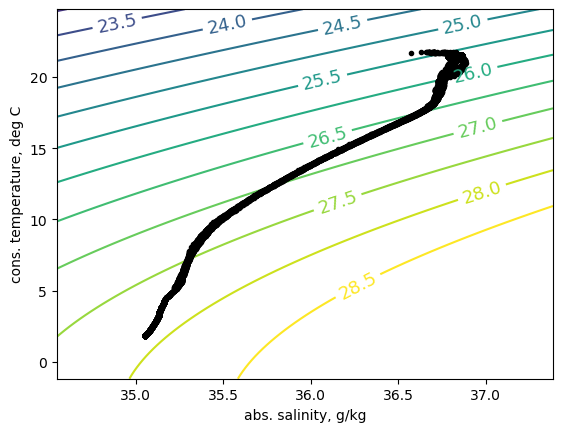

In [14]:
# create sigma-theta array
sig=gsw.sigma0(X,Y)
# plot the density contours
fig,ax=plt.subplots()
cont=np.arange(22,29,.5)
c=ax.contour(X,Y,sig,cont)
ax.clabel(c,inline=True,fontsize=13)
plt.plot(SA,CT,'k.')
plt.xlabel('abs. salinity, g/kg')
plt.ylabel('cons. temperature, deg C')
plt.show()